# Fantasy Football Scoring System


| Stat Category       | Point Value               |
|---------------------|---------------------------|
|Passing Yards	      | 1 point for every 25 yards|
|Passing TDs	      | 6 points                  |
|Passing Interceptions|	-2 points                 |
|Rushing Yeards       | 1 point for every 10 yards|
|Rushing TDs          | 6 points                  |
|Receiving Yards      | 1 point for every 10 yards|
|Receiving TDs        | 6 points                  |
|Fumbles Lost         | -2 points                 |


# QB Ratings

Load the data from the from the qb_games.csv file.

NOTE: Games, a count of games for the current season and career_games have been added so that you can differentiate between regular season games (the games used to calculate fantasy stats) and post season or playoff games.  Career Games are a count of how many games a player has played for their career.  It was added as a dimension to consider when measuring player growth, plateau and decline.

In [21]:
%matplotlib inline

import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

qb_games = pd.read_csv('qb_games.csv')
qb_games.columns.values

array(['Name', 'Year', 'Career Year', 'Game Count', 'Career Games', 'Date',
       'Team', 'Opp', 'Result', 'Pass Att', 'Pass Cmp', 'Pass Pct',
       'Pass Yds', 'Pass YPA', 'Pass TD', 'Pass Int', 'Pass Lg',
       'Pass Sack', 'Pass Rate', 'Rush Att', 'Rush Yds', 'Rush Avg',
       'Rush Lg', 'Rush TD', 'Rush FD'], dtype=object)

# Calculate Fantasy Points 

Calculate the fantasy points pased on the table above:

(qb_games['Pass Yds']/25) + (6 * qb_games['Pass TD']) - (2 * qb_games['Pass Int']) + (qb_games['Rush Yds'] /10) + (6 * qb_games['Rush TD'])

Store the data to be used for initial analysis in the  Data Frame qb_fantasy

In [31]:
qb_games['Fantasy Points'] = (qb_games['Pass Yds']/25) + (6 * qb_games['Pass TD']) - (2 * qb_games['Pass Int']) + (qb_games['Rush Yds'] /10) + (6 * qb_games['Rush TD'])
qb_fantasy = qb_games[['Name','Career Year', 'Year', 'Game Count', 'Career Games', 'Date', 'Pass Att', 'Pass Yds', 'Pass TD', 'Pass Int', 'Pass Rate', 'Rush Att', 'Rush Yds', 'Rush TD', 'Fantasy Points']]

qb_fantasy.head(10)

,Name,Career Year,Year,Game Count,Career Games,Date,Pass Att,Pass Yds,Pass TD,Pass Int,Pass Rate,Rush Att,Rush Yds,Rush TD,Fantasy Points
0,"feeley, aj",1,2001,1,1,01/06/02,14,143,2,1,114.0,0,0,0,15.72
1,"feeley, aj",2,2002,1,2,11/25/02,3,17,1,0,129.9,2,-3,0,6.38
2,"feeley, aj",2,2002,2,3,12/01/02,30,181,0,0,66.1,2,3,0,7.54
3,"feeley, aj",2,2002,3,4,12/08/02,35,190,2,1,81.8,3,0,0,17.60
4,"feeley, aj",2,2002,4,5,12/15/02,28,220,2,1,91.4,2,5,0,19.30
5,"feeley, aj",2,2002,5,6,12/21/02,33,253,1,2,66.9,2,2,0,12.32
6,"feeley, aj",2,2002,6,7,12/28/02,25,150,0,1,53.8,1,-1,0,3.90
7,"feeley, aj",4,2004,2,8,09/19/04,39,218,1,2,57.4,0,0,0,10.72
8,"feeley, aj",4,2004,3,9,09/26/04,27,137,0,2,32.5,0,0,0,1.48
9,"feeley, aj",4,2004,4,10,10/10/04,2,6,0,0,56.3,0,0,0,0.24


# Get the average QB fantasy points by year

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(len(qb_fantasy))
yearly_fantasy_points = qb_fantasy.groupby(['Career Year'], as_index=False).mean()
yearly_fantasy_points[['Career Year', 'Pass Att', 'Pass Rate', 'Fantasy Points']]



5799


,Career Year,Pass Att,Pass Rate,Fantasy Points
0,1,23.353511,68.959564,10.270460
1,2,26.140893,75.194330,13.007491
2,3,28.034036,77.260940,14.057342
3,4,28.614458,78.421536,14.473705
4,5,29.460102,83.620374,15.861868
5,6,30.707317,85.348943,16.426211
6,7,29.317647,84.520706,15.876847
7,8,31.405759,87.371990,17.356963
8,9,31.891176,86.966765,16.937000
9,10,31.849673,87.046732,17.006797


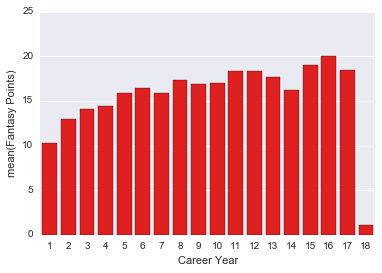

In [26]:
color = ['red']
ax = sns.barplot(yearly_fantasy_points['Career Year'], (yearly_fantasy_points['Fantasy Points'] ), palette=color)

## Observation

You can trace a sharp improvement in performance over years 1-6 where the fantasy total points increase from a yearly average of 10 to over 15 points.  There is then a plateau through seasons 7 through 14, and a slight uptick at seasons 15-17, but the averages do not break above 20 points on average.

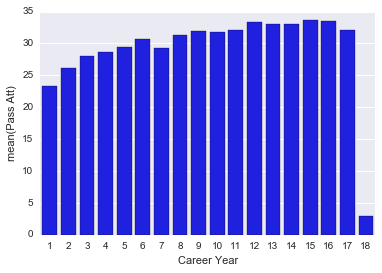

In [28]:
color = ['blue']
ax = sns.barplot(yearly_fantasy_points['Career Year'], (yearly_fantasy_points['Pass Att'] ), palette=color)


## Observation
The average passes attempted also match the growth in fantasy points in terms of having their 
sharpest increases in years 1-6, and generally plateauing after that.  One difference is that there really is no general increase in passes attempted years 15-17. 

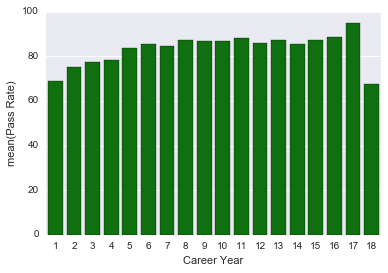

In [34]:
color = ['green']
ax = sns.barplot(yearly_fantasy_points['Career Year'], (yearly_fantasy_points['Pass Rate'] ), palette=color)

## Observation
The Passer Rating for QB's shows the same type of improvement for years 1-6 and the same plateau for every year after that.  

# Career Means for Key Statistics
Calculate the career means for each of the statistics charted above and use them as filters for evaluating players above and below the mean.


In [36]:
qb_means = qb_fantasy[['Pass Att', 'Pass Rate', 'Fantasy Points']].mean()
qb_means

Pass Att          29.471633
Pass Rate         81.886256
Fantasy Points    15.450271
dtype: float64

Shifting data to only include pass attempts when greater than 29 average pass attempts


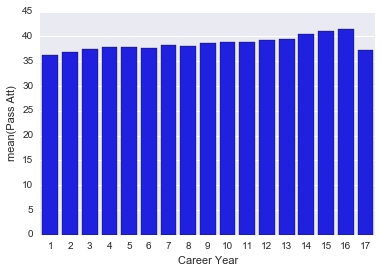

In [120]:
pass_att = qb_means['Pass Att']
qb_upper_pass_att = qb_fantasy.loc[qb_fantasy['Pass Att'] > pass_att]
qb_pass_att_mean = qb_upper_pass_att['Pass Att'].mean()
print('Shifting data to only include pass attempts when greater than %d average pass attempts' %(pass_att))
qb_att = qb_upper_pass_att.groupby(['Career Year'], as_index=False).mean()

color = ['blue']
ax = sns.barplot(qb_att['Career Year'], (qb_att['Pass Att'] ), palette=color)


## Observation
Shifting the data set to only include data for pass attempts above 29 does not greatly change the overall data.

Shifting data to only include pass attempts when greater than 81 average pass attempts


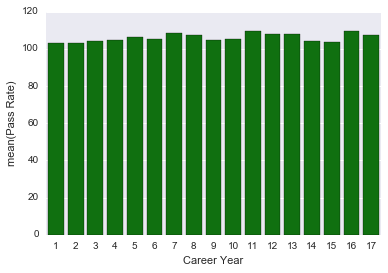

In [124]:
pass_rate = qb_means['Pass Rate']
qb_upper_pass_rate = qb_fantasy.loc[qb_fantasy['Pass Rate'] > pass_rate]
qb_pass_rate_mean = qb_upper_pass_rate['Pass Rate'].mean()
print('Shifting data to only include pass attempts when greater than %d average pass attempts' %(pass_rate))
qb_rate = qb_upper_pass_rate.groupby(['Career Year'], as_index=False).mean()

color = ['green']
ax = sns.barplot(qb_rate['Career Year'], (qb_rate['Pass Rate'] ), palette=color)



71
21.49234616650209


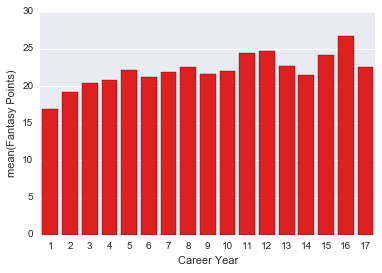

In [126]:
qb_upper_fantasy_rate = qb_fantasy.loc[qb_fantasy['Pass Rate'] > pass_rate]
qb_name = qb_upper_fantasy_rate.groupby(['Name'], as_index=False)
print(len(qb_name))
qb_fantasy_rate_mean = qb_upper_fantasy_rate['Fantasy Points'].mean()
print(qb_fantasy_rate_mean)
qb_rate = qb_upper_fantasy_rate.groupby(['Career Year'], as_index=False).mean()

color = ['red']
ax = sns.barplot(qb_rate['Career Year'], (qb_rate['Fantasy Points'] ), palette=color)


21.4923461665


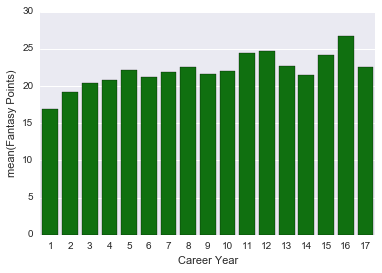

In [91]:
qb_upper_pass_rate = qb_fantasy.loc[qb_fantasy['Pass Rate'] > pass_rate]
qb_fantasy_rate = qb_upper_pass_rate.mean()
print(qb_fantasy_rate['Fantasy Points'])
qb_rate = qb_upper_pass_rate.groupby(['Career Year'], as_index=False).mean()

color = ['green']
ax = sns.barplot(qb_rate['Career Year'], (qb_rate['Fantasy Points'] ), palette=color)